In [1]:
import pandas as pd
import numpy as np 

In [2]:
data=pd.read_csv('D:\heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [4]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
x =data.iloc[:,0:11]
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [6]:
y=data['HeartDisease']
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [7]:
data.Age.unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71],
      dtype=int64)

In [8]:
data.iloc[:,11].unique()

array([0, 1], dtype=int64)

In [9]:
nomi_col=[2,6,10]
ordi_col=[1,8]
num_col=[0,3,4,5,7,9]

In [10]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn import set_config
trans = make_column_transformer((OneHotEncoder(sparse=False),nomi_col),
                               (OrdinalEncoder(),ordi_col),
                               (StandardScaler(),num_col),
                                remainder='passthrough')
set_config(display='diagram')
trans


ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 [2, 6, 10]),
                                ('ordinalencoder', OrdinalEncoder(), [1, 8]),
                                ('standardscaler', StandardScaler(),
                                 [0, 3, 4, 5, 7, 9])])

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.2)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
Model= KNeighborsClassifier(10)
pipe = make_pipeline(trans, Model)

In [13]:
Model

KNeighborsClassifier(n_neighbors=10)

In [14]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8]),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  [0, 3, 4, 5, 7, 9])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=10))])

In [15]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8]),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  [0, 3, 4, 5, 7, 9])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=10))])

In [16]:
pred=pipe.predict (x_test)

In [17]:
pred

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(pred, y_test)*100

85.86956521739131

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
perceptronalg= KNeighborsClassifier(10)
pipe = make_pipeline(trans, perceptronalg)

In [20]:
from sklearn.linear_model import Perceptron
from sklearn.pipeline import make_pipeline
prc = Perceptron(class_weight='balanced')
#perceptronalg= KNeighborsClassifier(2)
pipe_prc = make_pipeline(trans,prc)
pipe_prc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8]),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  [0, 3, 4, 5, 7, 9])])),
                ('perceptron', Perceptron(class_weight='balanced'))])

In [21]:
pipe_prc.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8]),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  [0, 3, 4, 5, 7, 9])])),
                ('perceptron', Perceptron(class_weight='balanced'))])

In [22]:
pred_prc= pipe_prc.predict(x_test)

In [23]:
accuracy_score(pred_prc, y_test)*100

76.08695652173914

In [24]:
x2=data.loc[:,['MaxHR','Age']]
y2=data.HeartDisease
#Model= KNeighborsClassifier(10)
prc = Perceptron(class_weight='balanced')

prc.fit(x2,y2)

Perceptron(class_weight='balanced')

In [25]:
pip install mlxtend  

Note: you may need to restart the kernel to use updated packages.


In [26]:
import mlxtend

C:\Users\viplo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<AxesSubplot:>

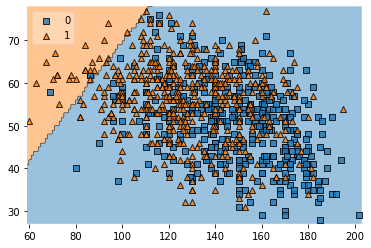

In [27]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x2.values,y2.values,clf=prc,legend=2)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
model= LogisticRegression (solver='liblinear')
pipe= make_pipeline(trans,model)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8]),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  [0, 3, 4, 5, 7, 9])])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [29]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8]),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  [0, 3, 4, 5, 7, 9])])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [30]:
prediction = pipe.predict(x_test)

In [31]:
prediction

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [32]:
accuracy_score(prediction,y_test)*100

84.78260869565217

In [33]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
algorithm=SVC()
pipe3= make_pipeline(trans,algorithm)
pipe3


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8]),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  [0, 3, 4, 5, 7, 9])])),
                ('svc', SVC())])

In [34]:
pipe3.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8]),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  [0, 3, 4, 5, 7, 9])])),
                ('svc', SVC())])

In [35]:
prediction3=pipe3.predict(x_test)

In [36]:
accuracy_score(prediction3,y_test)*100

84.23913043478261

C:\Users\viplo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

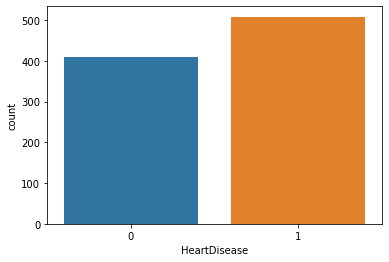

In [37]:
import seaborn as sns
sns.countplot(y)

In [40]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)



In [41]:
import imblearn

In [42]:
from imblearn.under_sampling import RandomUnderSampler
under= RandomUnderSampler()
u_x,u_y = under.fit_resample(x,y)
u_y.value_counts()

0    410
1    410
Name: HeartDisease, dtype: int64

In [43]:
from imblearn.over_sampling import RandomOverSampler
under = RandomOverSampler()
u_x, u_y = under.fit_resample(x,y)
u_y.value_counts()

0    508
1    508
Name: HeartDisease, dtype: int64

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(pred, y_test)*100

85.86956521739131